# Binning ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.shape

(891, 3)

In [4]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(571, 2)

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6433566433566433

In [13]:
# Applying cross-val-score
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

np.float64(0.6345266040688575)

In [14]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [15]:
trf = ColumnTransformer([
    ('one',kbin_age,[0]),
    ('two',kbin_fare,[1])
])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [17]:
trf.named_transformers_

{'one': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'two': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [18]:
trf.named_transformers_['one'].n_bins_

array([10])

In [19]:
trf.named_transformers_['one'].bin_edges_ 

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [20]:
trf.named_transformers_['two'].bin_edges_

array([array([  0.     ,   7.74336,   7.925  ,   8.6625 ,  10.5    ,  14.4542 ,
               22.62   ,  28.39   ,  38.1    ,  57.78336, 512.3292 ])          ],
      dtype=object)

In [21]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [22]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0


In [23]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['one'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['two'].bin_edges_[0].tolist())

In [24]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
835,39.0,7.0,83.1583,9.0,"(38.6, 47.8]","(57.783, 512.329]"
853,16.0,1.0,39.4000,7.0,"(11.0, 17.0]","(38.1, 57.783]"
487,58.0,9.0,29.7000,7.0,"(47.8, 62.0]","(28.39, 38.1]"
784,25.0,4.0,7.0500,0.0,"(24.0, 28.0]","(0.0, 7.743]"
447,34.0,6.0,26.5500,6.0,"(30.1, 34.4]","(22.62, 28.39]"


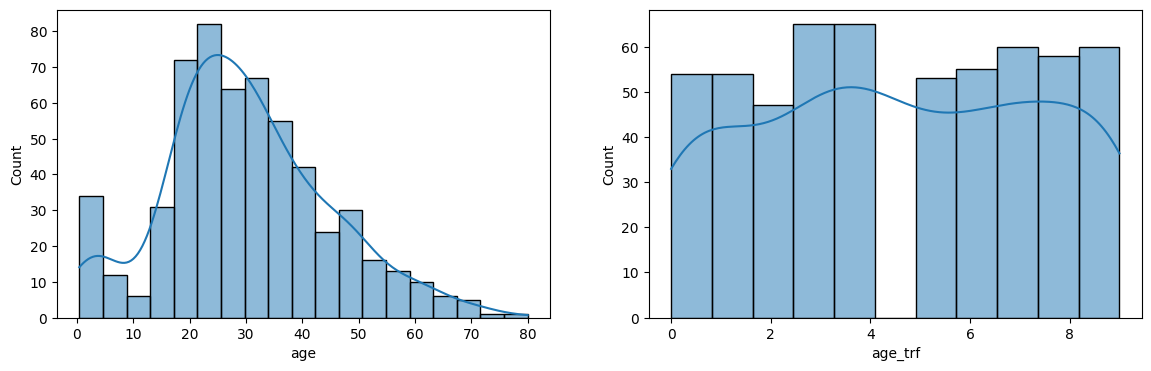

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(output['age'],kde=True)

plt.subplot(1,2,2)
sns.histplot(output['age_trf'],kde=True)
plt.show()

In [26]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [27]:
y_pred1 = clf1.predict(X_test_trf)
accuracy_score(y_test,y_pred1)

0.6853146853146853

In [28]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.682140062597809)

In [49]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
    ('one',kbin_age,[0]),
    ('two',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X['Age'],color='b',kde=True)
    plt.title("Before")
    
    plt.subplot(1,2,2)
    sns.histplot(X_trf[:,0],color='r',kde=True)
    plt.title("After")

    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X['Fare'],color='b',kde=True)
    plt.title("Before")

    plt.subplot(1,2,2)
    sns.histplot(X_trf[:,1],color='r',kde=True)
    plt.title("After")
    plt.show()

0.6386932707355243


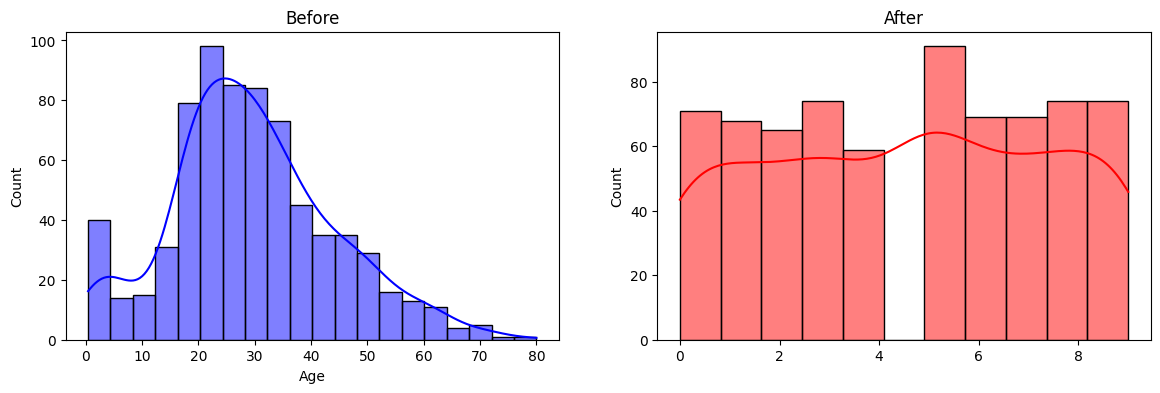

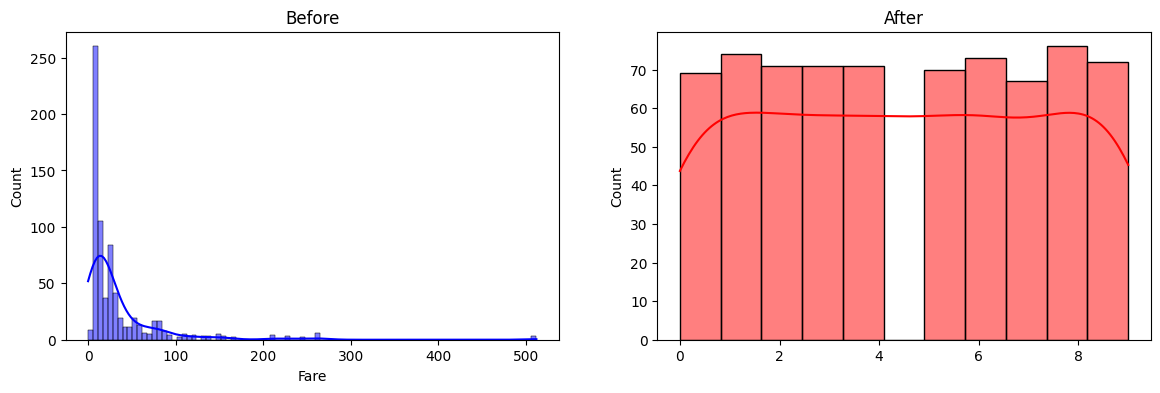

In [30]:
discretize(10,'quantile')

0.6288928012519561


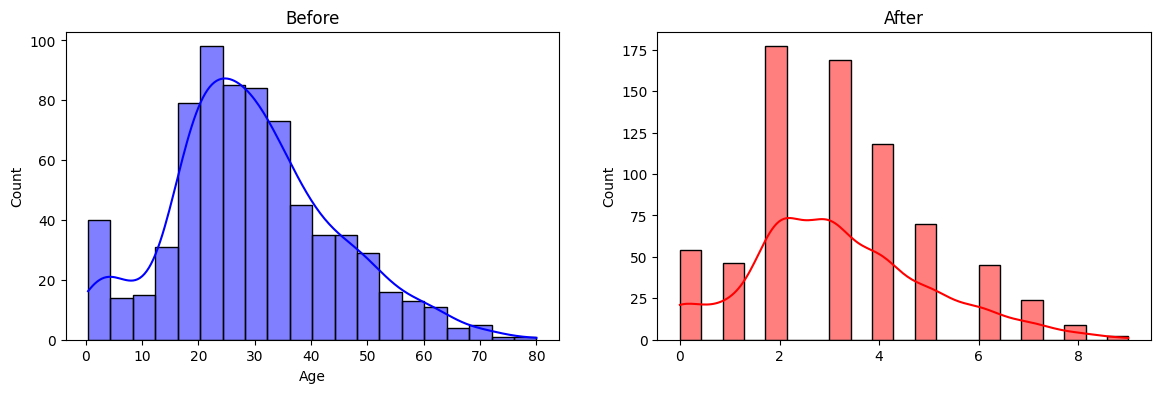

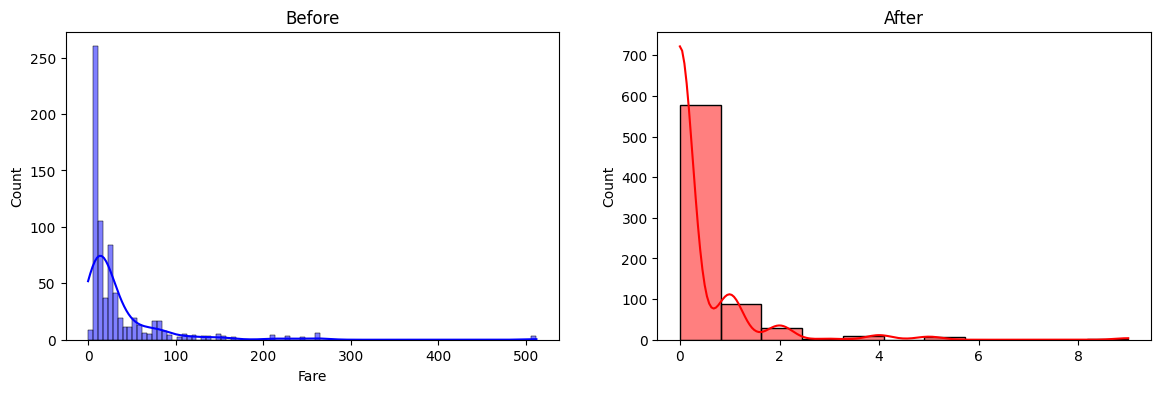

In [31]:
discretize(10,'uniform')

0.6275234741784037


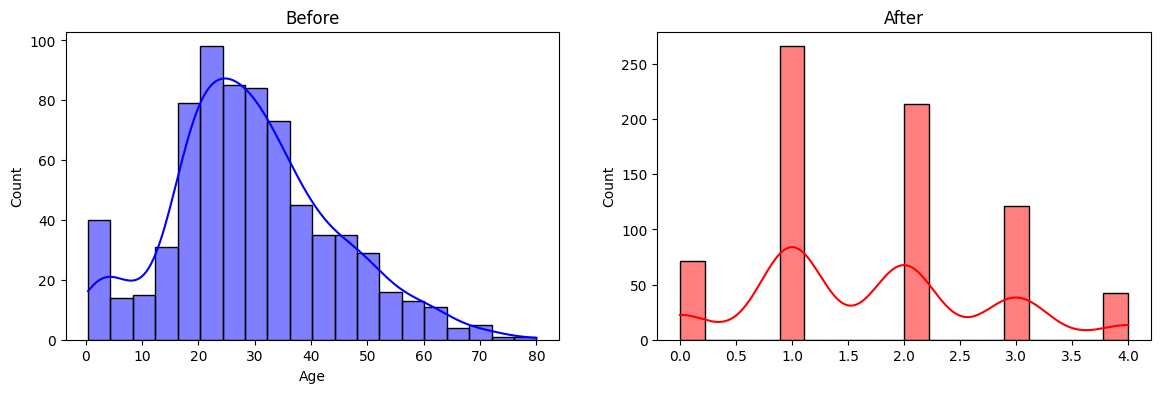

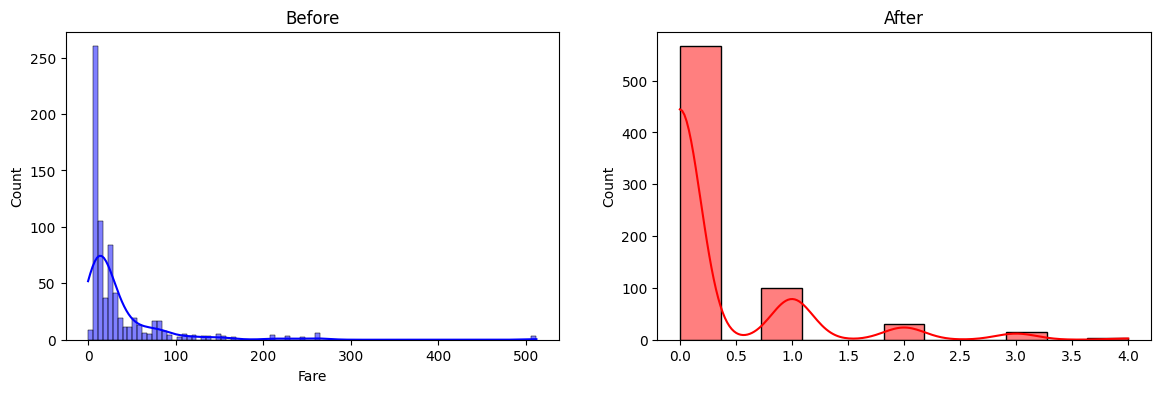

In [32]:
discretize(5,'kmeans')

# Binarization ...

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [34]:
df = pd.read_csv("titanic.csv",usecols=['Age','Fare','SibSp','Parch','Survived'])
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [35]:
df.isna().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df['family'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [38]:
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [39]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
# without binarization
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [42]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

np.float64(0.6429186228482002)

In [43]:
# applying binarization
from sklearn.preprocessing import Binarizer

In [44]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [45]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [46]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [47]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6153846153846154

In [48]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6318075117370892)